# Исследование для  отдела маркетинга интернет-магазина

**Описание проекта**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Нам неободимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.  
**В наличии есть следующие данные:**
- в файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
- в файлах `/datasets/orders.csv` и `/datasets/visitors.csv` описанные результаты проведенного A/B-теста.

**Цель исследования**

Часть 1. Приоритизация гипотез.
- приоритизировать гипотезы с помощью фреймворков ICE и RICE

Часть 2. Анализ A/B-теста
- проанализировать A/B-тест
- построить график: 
 - кумулятивной выручки
 - среднего чека 
 - относительного изменения кумулятивного среднего чека 
 - кумулятивного среднего количества заказов на посетителя
 - относительного изменения кумулятивного среднего количества заказов на посетителя
 - точечный график количества заказов по пользователям
 - точечный график стоимостей заказов
- выбрать границу для определения аномальных пользователей и аномальных заказов
- посчитать статистическую значимость различий в среднем количестве заказов и среднем чеке заказа по сырым и очищенным данным
- cделать выводы и предположения
- принять решение по результатам теста и объяснить его

**Ход исследования**
1. Загрузить файлы с данными и выполнить обзор данных
2. Предобработка данных
3. Приоритизация гипотез
4. Анализ A/B-теста
5. Общий вывод
---

## Файлы с данными и общая информация

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

**Загрузим данные с гипотезами, а так же данные с заказами и визитами из CSV-файлов в переменные**

In [2]:
visits = pd.read_csv('visitors.csv')  # визиты
orders = pd.read_csv('orders.csv')  # заказы
hypothesis = pd.read_csv('hypothesis.csv')  # гипотезы

display(visits.head())
display(orders.head())
hypothesis.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


**Отобразим основную информацию о данных**

In [3]:
display(visits.info())
display(orders.info())
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


---
### Вывод

**Отобразили начальные строки таблиц и общую информацию**  

**Описание данных**  
В нашем распоряжении три датасета. Файл `hypothesis.csv` хранит информацию о гипотезах, `orders.csv` — информацию о заказах, а `visitors.csv` — информацию о визитах пользователей.

Структура `hypothesis.csv`:  
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
- **Таблица с 5 столбцами(4 числовых и 1 строковый) и 9 строками**

Структура `orders.csv`:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.
- **Таблица с 5 столбцами(3 числовых и 2 строковых) и 1197 строками**

Структура `visitors.csv`:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста
- **Таблица с 3 столбцами(1 числовой и 2 строковых) и 62 строками**
---

## Предобработка данных

### Заменим названия столбцов

#### Приведем к нижнему регистру

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

### Преобразуем данные в нужные типы

**В столбцах `visits['date']` и `orders['date']` переведем значения в специальный формат для работы с датами**

In [5]:
visits['date'] = pd.to_datetime(visits['date'])
orders['date'] = pd.to_datetime(orders['date'])

### Обработаем пропуски

**Определим количество пропущенных значений в таблицах для каждого столбца**

In [6]:
for table in [visits, orders, hypothesis]:
    display(table.isna().sum())

date        0
group       0
visitors    0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

**Пропусков не обнаружено**

### Обработаем дубликаты

#### Выявим явные дубликаты и удалим, если таковые имеются

In [7]:
for table in [visits, orders, hypothesis]:
    display(table.duplicated().sum())

0

0

0

**Явные дубликаты отсутствуют**

#### Выявим неявные дубликаты

Проверим, есть ли в таблице orders пользователи, оказавшиеся одновременно в двух группах. При А/В тестировании могут быть ошибки при логировании и распределении пользователей по группам

Найдем ID пользователей, оказавшихся одновременно в двух группах

In [8]:
a_b_userId = (
    orders[orders['group'] == 'B'][
        orders[orders['group'] == 'B']['visitorId'].isin(orders[orders['group'] == 'A']['visitorId'])
    ]['visitorId'].unique()
)

a_b_userId

array([ 963407295,  351125977, 3234906277,  237748145, 2038680547,
       4256040402, 2712142231,    8300375,  276558944,  457167155,
       3062433592, 2716752286, 1648269707,  199603092, 3803269165,
       2686716486, 2579882178, 3984495233, 1668030113, 1738359350,
       3717692402, 2458001652, 2378935119, 1294878855, 1404934699,
       2587333274, 3202540741, 2954449915, 2927087541, 2600415354,
       3951559397, 2044997962, 3972127743, 3957174400, 3891541246,
       1230306981, 4266935830, 1614305549, 1333886533,  477780734,
       1602967004, 1959144690, 1801183820, 4186807279, 3766097110,
       2780786433, 1316129916,  393266494, 3941795274,  232979603,
       4120364173, 3656415546, 4069496402, 2654030115,  818047933,
       3963646447,  471551937, 2949041841], dtype=int64)

Определеим для них правильную группу - это та группа, в которую они залогинились в первый раз

In [9]:
right_group = (
    orders[orders['visitorId'].isin(a_b_userId)]
    .groupby('visitorId')['group'].first().reset_index()
)

right_group.head()

,visitorId,group
0,8300375,B
1,199603092,A
2,232979603,B
3,237748145,B
4,276558944,B


In [10]:
# функция для присвоения правильной группы пользователю
def group_funk(row):
    if row['visitorId'] in a_b_userId:
        return right_group[right_group['visitorId'] == row['visitorId']]['group'].values[0]
    else:
        return row['group']

**Присвоим правильное значение группы для пользователей**

In [11]:
orders['group'] = orders.apply(group_funk, axis=1)

### Обработаем редкие и выбивающиеся значения

**На данном этапе исследования не будем выявлять и удалять эти значения, они необходимы для проведения A/B теста на 'сырых данных'**

### Оценим общую информацию по таблице после преобразований

In [12]:
for table in [visits, orders, hypothesis]:
    display(table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

---
### Вывод

**заменили названия столбцов**
- привели к нижнему регистру

**преобразовали данные в нужные типы**
- в столбцах `visits['date']` и `orders['date']` перевели значения в специальный формат для работы с датами

**обработали пропуски**
- пропусков не обнаружено

**обработали дубликаты**
- явные дубликаты отсутствуют
- проверили неявные дубликаты
 - выяснили, есть ли в таблице `orders` пользователи, оказавшиеся одновременно в двух группах. При А/В тестировании могут быть ошибки при логировании и распределении пользователей по группам
 - нашли ID пользователей, оказавшихся одновременно в двух группах
 - определили для них правильную группу - это та группа, в которую они залогинились в первый раз
 - присвоили правильное значение группы для пользователей

**обработали редкие и выбивающиеся значения**
- на данном этапе исследования не будем выявлять и удалять эти значения, они необходимы для проведения A/B теста на 'сырых данных'
---

## Приоритизация гипотез

В файле `hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort

In [13]:
pd.options.display.max_colwidth = 1
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [14]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(3)
hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000


**Наблюдаем гипотезу номер 8 на первом месте, далее идут гипотезы 0 и 7**

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [15]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,3.0


In [16]:
hypothesis.loc[7, 'hypothesis']

'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

**Наблюдаем гипотезу номер 7 на первом месте, далее идут гипотезы 2 и 0**

---
### Вывод

**Применили фреймворк ICE для приоритизации гипотез. Отсортировали их по убыванию приоритета**
- на первом месте оказалась гипотеза 8, далее гипотезы 0 и 7

**Применили фреймворк RICE для приоритизации гипотез. Отсортировали их по убыванию приоритета**
- первое место за гипотезой 7, далее гипотезы 2 и 0

**Наблюдаем изменение приоритизации гипотез при применении RICE вместо ICE. Это не удивительно, так как гипотеза ICE не учитывает такого важного параметра как `Reach — скольких пользователей затронет изменение, которое вы хотите внести`**  
**Считаем приоритизацию через фреймворк `RICE` более подходящей для нашего исследования, так как в нем учитываются больше параметров для оценки**


- Для дальнейшей работы возьмем гипотезу `7`,- **'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'**
---

## Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах `orders.csv` и `visitors.csv`

In [17]:
display(orders.head())
visits.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Проанализируем A/B-тест

**Начнём с подготовки данных**

In [18]:
# создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получим агрегированные кумулятивные по дням данные о заказах
ordersAggregated = (
    datesGroups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = (
    datesGroups
    .apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,22,21,107017,713
2,2019-08-02,A,43,37,237869,1338
3,2019-08-02,B,46,43,271280,1294
4,2019-08-03,A,67,61,350342,1845


### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения

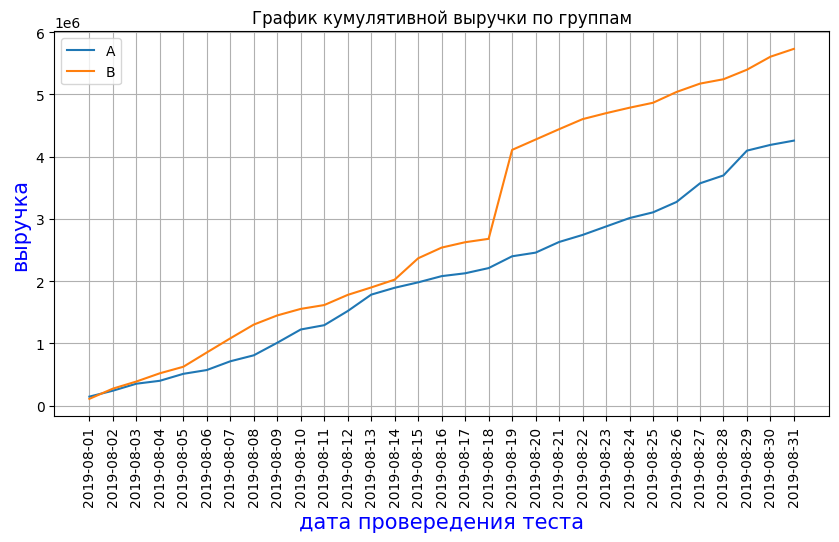

In [19]:
plt.figure(figsize=(10, 5))

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B']

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.grid()
plt.xlabel('дата провередения теста', fontsize=15, color='blue')
plt.ylabel('выручка', fontsize=15, color='blue')
plt.title('График кумулятивной выручки по группам')
plt.xticks(ticks=cumulativeRevenueA['date'], rotation=90, fontsize=10)
plt.legend();

- **выручка почти равномерно увеличивается в течение всего теста. Хороший знак**
- **однако график выручки группы `B` между 18 и 19 августа резко вырос. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем позже**

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения

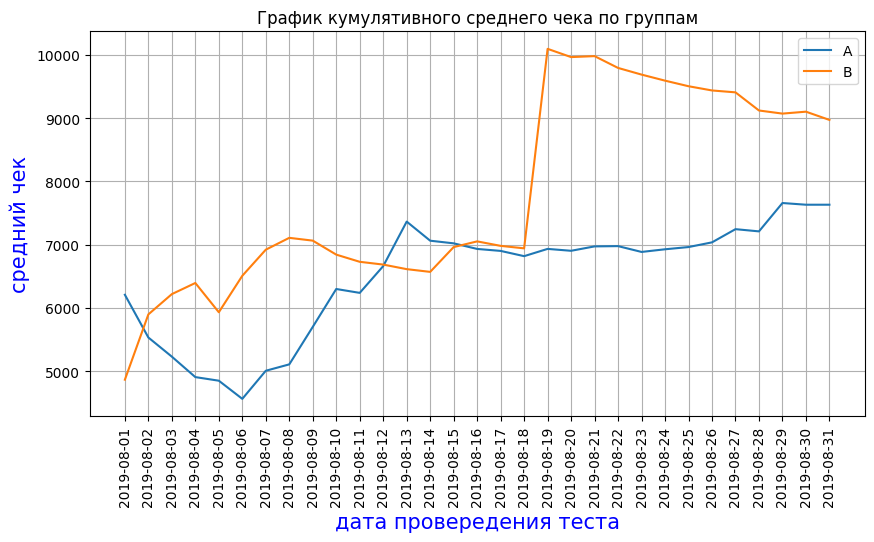

In [20]:
plt.figure(figsize=(10, 5))

# разделим кумулятивную выручку на кумулятивное число заказов по группам
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.grid()
plt.xlabel('дата провередения теста', fontsize=15, color='blue')
plt.ylabel('средний чек', fontsize=15, color='blue')
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(ticks=cumulativeRevenueA['date'], rotation = 90, fontsize = 10)
plt.legend();

- **cредний чек становится равномерным с середины теста**
- **возможно, в группу `B` в середине теста попали крупные заказы (резкий всплеск на графике)**

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения

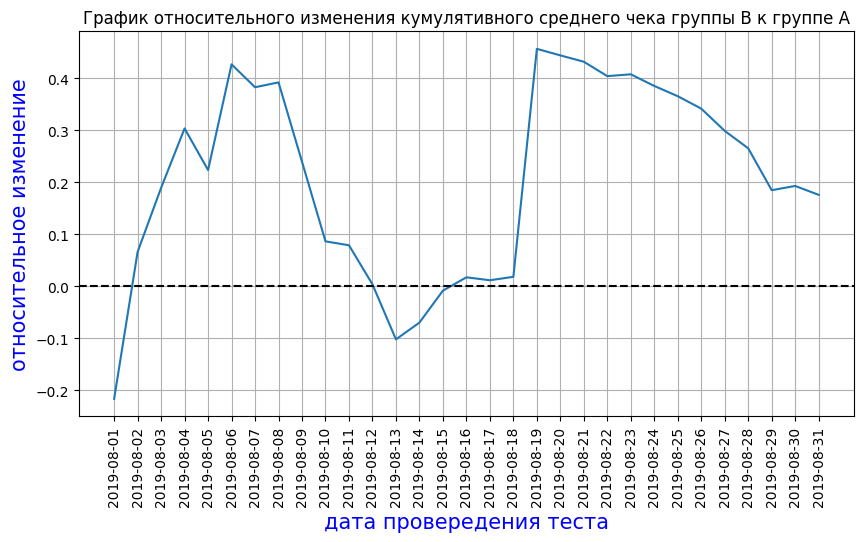

In [21]:
plt.figure(figsize=(10, 5))

# собираем данные в одном датафрейме
mergedCumulativeRevenue = (
    cumulativeRevenueA
    .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.grid()
plt.xlabel('дата провередения теста', fontsize=15, color='blue')
plt.ylabel('относительное изменение', fontsize=15, color='blue')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(ticks=mergedCumulativeRevenue['date'], rotation = 90, fontsize = 10);

- **в нескольких точках график различия между сегментами резко «скачет»**
- **все указывает на наличие выбросов в данных**

### Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения

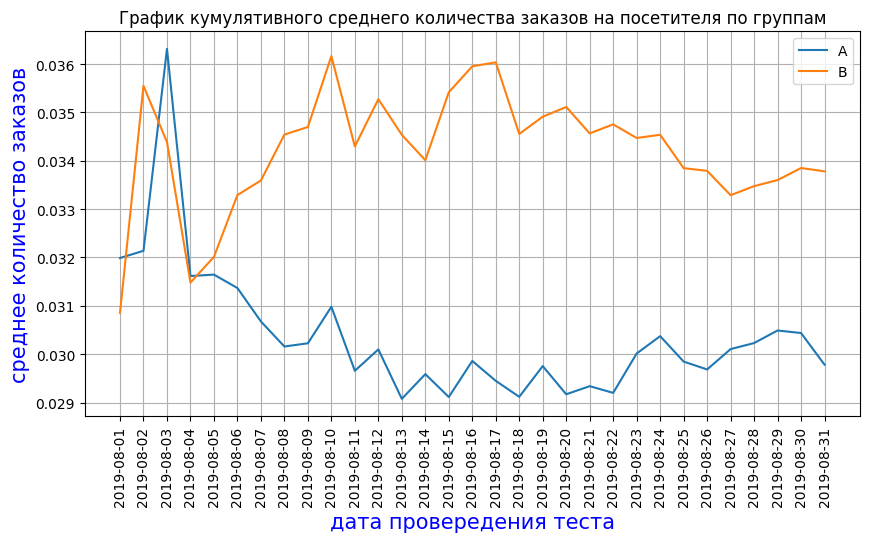

In [22]:
plt.figure(figsize=(10, 5))

# Строим график заказов группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders'] / cumulativeRevenueA['visitors'], label='A')

# Строим график заказов группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders'] / cumulativeRevenueB['visitors'], label='B')

plt.grid()
plt.xlabel('дата провередения теста', fontsize=15, color='blue')
plt.ylabel('среднее количество заказов', fontsize=15, color='blue')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(ticks=cumulativeRevenueA['date'], rotation = 90, fontsize = 10)
plt.legend();

- **группы сильно колебались в начале теста, но затем стабилизировались**
- **среднее количества заказов на посетителя группы `B` вырвалось вперед и зафиксировалось, а группы `A` просела и также зафиксировалась**

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения

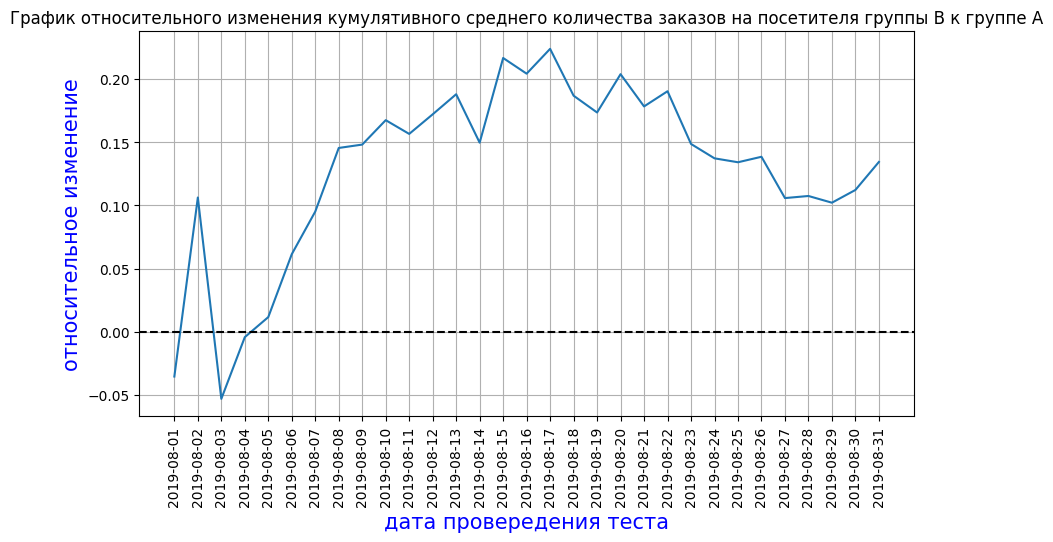

In [23]:
plt.figure(figsize=(10, 5))

# cтроим отношение среднего количества заказов
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])
         /(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.grid()
plt.xlabel('дата провередения теста', fontsize=15, color='blue')
plt.ylabel('относительное изменение', fontsize=15, color='blue')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xticks(ticks=mergedCumulativeRevenue['date'], rotation = 90, fontsize = 10);

- **в начале теста группа B проигрывала группе A, затем после 5 августа вырвалась вперед и далее находится выше группы A**
- **с 10 августа отношение стабилизировалось**

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения

In [24]:
# подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


- **есть пользователи, которые совершали 5, 8, 9 и 11 заказов**

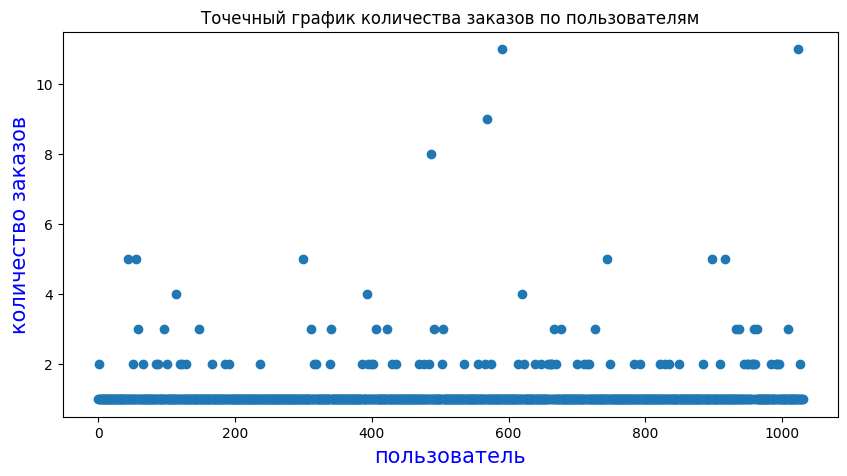

In [25]:
plt.figure(figsize=(10, 5))

# построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('пользователь', fontsize=15, color='blue')
plt.ylabel('количество заказов', fontsize=15, color='blue')
plt.scatter(x_values, ordersByUsers['orders']);

- **большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна**
- **их точная доля не ясна — непонятно, считать их аномалиями или нет**

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [26]:
# посчитаем выборочные перцентили количества заказов на одного пользователя
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


- не более **5%** пользователей оформляли больше чем **2 заказа**
- не более **1%** пользователей заказывали более **4 раз**
- разумно выбрать **3 заказа** на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения

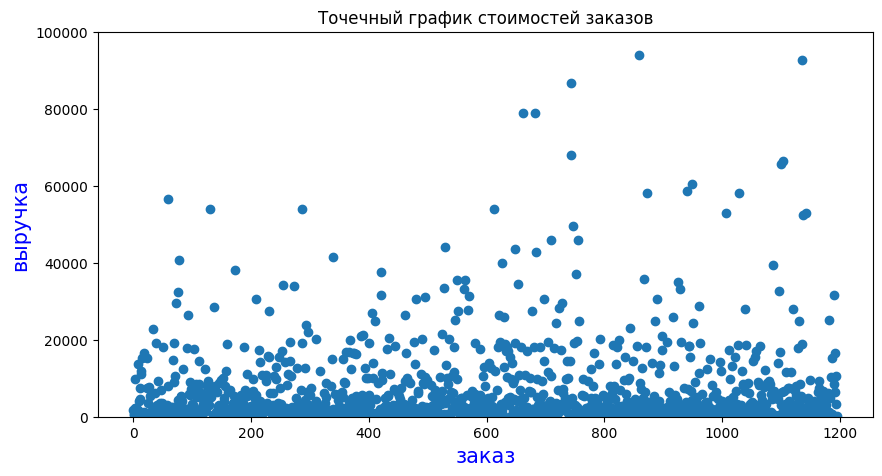

In [27]:
plt.figure(figsize=(10, 5))

x_values = pd.Series(range(0,len(orders['revenue'])))

plt.title('Точечный график стоимостей заказов')
plt.xlabel('заказ', fontsize=15, color='blue')
plt.ylabel('выручка', fontsize=15, color='blue')
plt.ylim([0, 100000])
plt.scatter(x_values, orders['revenue']);

- **в данных явно есть аномально дорогие заказы**
- однако большинство всё-таки имеет меньшую выручку
- **по графику сложно выбрать границу аномальных заказов**

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [28]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


- не более **5%** заказов дороже **28 000 рублей**
- не более **1%** дороже **58 233 рублей**
- примем за аномальных пользователей тех, кто совершил покупку **дороже 28 000 рублей**. Так мы уберём **5%** пользователей с наиболее дорогими заказами

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения

Сформулируем гипотезы
- **Нулевая**: различий в среднем количестве заказов на посетителя между группами нет
- **Альтернативная**: различия в среднем между группами есть

In [29]:
# начнём с подготовки данных
visitorsADaily = visits[visits['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsBDaily = visits[visits['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

data = (
    ordersADaily
    .merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,visitorsPerDateA,visitorsPerDateB
0,2019-08-01,23,142779,22,107017,719,713
1,2019-08-02,20,95090,24,164263,619,581
2,2019-08-03,24,112473,16,114248,507,509
3,2019-08-04,14,47016,19,132380,717,770
4,2019-08-05,24,111753,24,104893,756,707


**Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['userId', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов**

In [30]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

**Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке `критерием Манна-Уитни`.**

In [31]:
sampleA = (
    pd.concat([ordersByUsersA['orders']
    ,pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']))
    ,name='orders')],axis=0)
)
sampleB = (
    pd.concat([ordersByUsersB['orders']
    ,pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders']))
    ,name='orders')],axis=0)
)

**Применим критерий и отформатируем *p-value*, округлив его до трёх знаков после запятой**

Напомним, что в `sampleA` сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов `sampleA` — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке `sampleA` методом `mean()`. Аналогично найдём среднее группы B: `SampleB.mean()`.

**Выведем относительный прирост среднего числа заказов группы B: `среднее число заказов группы B / среднее число заказов группы A - 1`.  Округлим до трёх знаков после запятой**

In [32]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("относительный прирост: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
относительный прирост: 0.134


- критический уровень статистической значимости мы приняли **5%** - это является общепринятым пороговым значением
- значение p-value показывает: вероятность случайно получить такое или большее различие **1,7%**. Это достаточная вероятность, чтобы делать вывод о значимом различии
- полученные данные противоречат нулевой гипотезе о том, что различий в среднем количестве заказов на посетителя между группами нет, поэтому у нас есть основания отбросить нулевую гипотезу и принять гипотезу о том, что различия есть
- p-значение **0.017 < 0.05** (критический уровень статистической значимости)
- **отвергаем нулевую гипотезу: разница статистически значима**
- **по «сырым» данным можем предположить что различия в среднем количестве заказов на посетителя между группами есть**
- относительный выигрыш группы B равен **13.4%**

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения

Сформулируем гипотезы
- **Нулевая**: различий в среднем чеке заказа между группами нет
- **Альтернативная**: различия в среднем чеке заказа между группами есть

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию `mannwhitneyu()` данные о выручке с заказов.

А ещё найдём относительные различия в среднем чеке между группами

In [33]:
print(
    'p-value: {0:.3f}'
    .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
)
print(
    'относительный прирост: {0:.3f}'
    .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
)

p-value: 0.646
относительный прирост: 0.176


- критический уровень статистической значимости мы приняли **5%** - это является общепринятым пороговым значением
- значение p-value показывает: вероятность случайно получить такое или большее различие **64,6%**. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками покупателей
- полученные данные не противоречат нулевой гипотезе о том, что различий в среднем чеке заказа между группами нет
- p-значение **0.646 > 0.05** (критический уровень статистической значимости)
- **не можем отвергнуть нулевую гипотезу: разница не является статистически значимой**
- **по «сырым» данным можем предположить что различия в среднем количестве заказов на посетителя между группами нет**
- относительный выигрыш группы B равен **17.6%**

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения

Напомним, что найденные 95-й и 99-й перцентили средних чеков равны **28000 и 58233.2** рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны **2 и 4** заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил **более 3 заказов** или совершил заказ **дороже 28 000 рублей**. Так мы уберём от 1% до 5% пользователей с наибольшим числом заказов и пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 3 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 28 000 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`.

Узнаем, сколько всего аномальных пользователей атрибутом `shape`

In [34]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > (int(np.percentile(ordersByUsers['orders'], [95])) + 1)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > (int(np.percentile(ordersByUsers['orders'], [95])) + 1)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [95]))]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.shape[0]

67

- **всего 67 аномальных пользователя**

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста

In [35]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам

In [36]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительный прирост: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.017
относительный прирост: 0.145


- критический уровень статистической значимости мы приняли **5%** - это является общепринятым пороговым значением
- значение p-value показывает: вероятность случайно получить такое или большее различие **1,7%**. Это достаточная вероятность, чтобы делать вывод о значимом различии
- полученные данные противоречат нулевой гипотезе о том, что различий в среднем количестве заказов на посетителя между группами нет, поэтому у нас есть основания отбросить нулевую гипотезу и принять гипотезу о том, что различия есть
- p-значение **0.017 < 0.05** (критический уровень статистической значимости)
- **отвергаем нулевую гипотезу: разница статистически значима**
- **по «очищенным» данным можем предположить что различия в среднем количестве заказов на посетителя между группами есть**
- относительный выигрыш группы B равен **14.5%**
- **результаты по среднему количеству заказов по «сырым» и «очищенным» данным не изменились**
- **p-value 0.017 по «сырым», 0.017 по «очищенным» данным**
- **относительная сила группы `B` 0.134 по «сырым», 0.145 по «очищенным» данным**

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения

Результаты по среднему количеству заказов практически не изменились. Проверим произошло ли что-нибудь с результатами по среднему чеку

In [37]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "относительный прирост: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.774
относительный прирост: 0.005


- критический уровень статистической значимости мы приняли **5%** - это является общепринятым пороговым значением
- значение p-value показывает: вероятность случайно получить такое или большее различие **77,4%**. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками покупателей
- полученные данные не противоречат нулевой гипотезе о том, что различий в среднем чеке заказа между группами нет
- p-значение **0.774 > 0.05** (критический уровень статистической значимости)
- **не можем отвергнуть нулевую гипотезу: разница не является статистически значимой**
- **по «очищеным» данным можем предположить что различия в среднем количестве заказов на посетителя между группами нет**
- относительный выигрыш группы B равен **0.5%**
- **результаты по среднему чеку по «сырым» и «очищенным» данным претерпели определнные изменения**
- **p-value 0.646 по «сырым», 0.774 по «очищенным» данным - на общий вывод изменения не повлияли, только еще более убедили нас в том, что какого-либо различия в среднем чеке не наблюдается**
- **относительная сила группы `B` 0.176 по «сырым», 0.005 по «очищенным» данным, тут очищенный датасет показал, что в группах присутствовали достаточно мощные выбросы, после удаления которых, данных пришли в норму, и мы более не наблюдаем какого-либо значимого относительного различия между группами**

### Примем решение по результатам теста и объясним его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Имеющиеся факты:**

- есть статистически значимое различия по среднему количеству заказов между группами и по «сырым» и по данным после фильтрации аномалий
- **p-value 0.017 по «сырым», 0.017 по «очищенным» данным**
- **относительная сила группы `B` 0.134 по «сырым», 0.145 по «очищенным» данным**
- график различия среднего количества заказов между группами сообщает, что **результаты группы B лучше группы A**

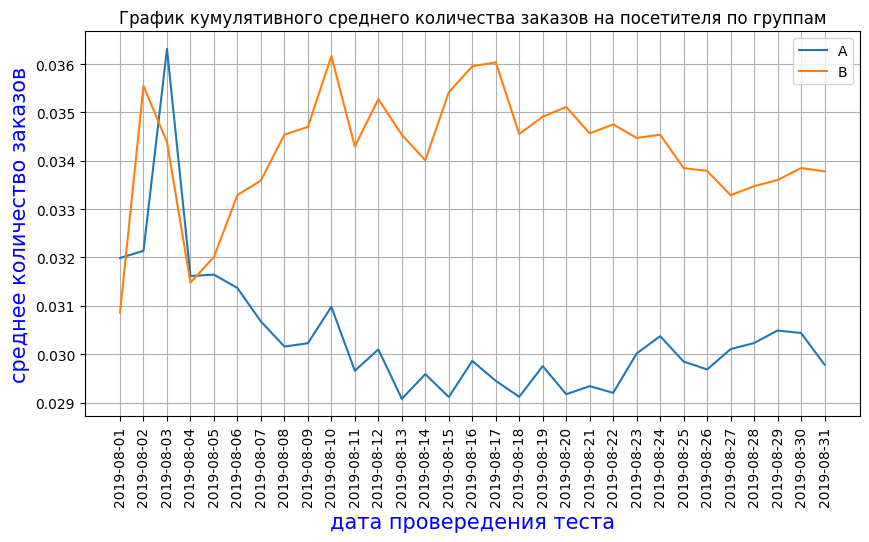

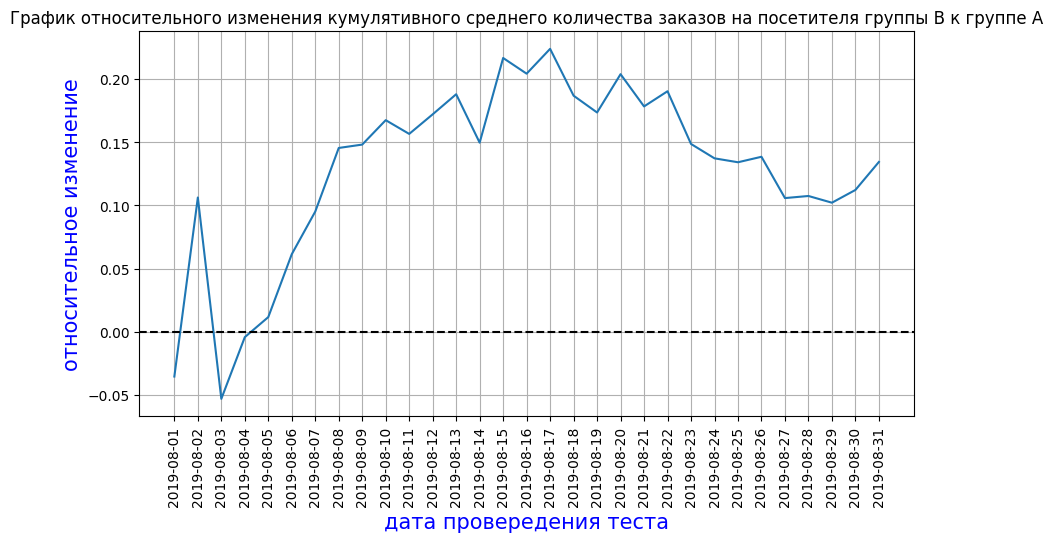

- нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий
- **p-value 0.646 по «сырым», 0.774 по «очищенным» данным - на общий вывод изменения не повлияли, только еще более убедили нас в том, что какого-либо различия в среднем чеке не наблюдается**
- **относительная сила группы `B` 0.176 по «сырым», 0.005 по «очищенным» данным, тут очищенный датасет показал, что в группах присутствовали достаточно мощные выбросы, после удаления которых, данных пришли в норму, и мы более не наблюдаем какого-либо значимого относительного различия между группами**

- **исходя из обнаруженных фактов, тест следует остановить и признать его успешным** 
- обнаружено статистически значимое различие в среднем количестве заказов между группами
- **группа B показывает себя лучше группы A по количеству заказов на 14.5%**
- статистически значимого различия в среднем чеке не обнаружено
- продолжать смысла нет, так как наблюдаем фиксацию результатов, тенденций к изменению полученных результатов не обнаруживаем
---

### Вывод

**Проанализировали A/B-тест**
- подготовили данные, получили агрегированные кумулятивные по дням данные о заказах и визитах пользователей


- построили график кумулятивной выручки по группам
 - **выручка почти равномерно увеличивается в течение всего теста. Хороший знак**
 - **однако график выручки группы `B` между 18 и 19 августа резко вырос. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализировали позже**


- построили график кумулятивного среднего чека по группам
 - **cредний чек становится равномерным с середины теста**
 - **возможно, в группу `B` в середине теста попали крупные заказы (резкий всплеск на графике)**


- построили график относительного изменения кумулятивного среднего чека группы B к группе A
 - **в нескольких точках график различия между сегментами резко «скачет»**
 - **все указывает на наличие выбросов в данных**
 
 
- построили график кумулятивного среднего количества заказов на посетителя по группам
 - **группы сильно колебались в начале теста, но затем стабилизировались**
 - **среднее количества заказов на посетителя группы `B` вырвалось вперед и зафиксировалось, а группы `A` просела и также зафиксировалась**
 
 
- построили график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
 - **в начале теста группа B проигрывала группе A, затем после 5 августа вырвалась вперед и далее находится выше группы A**
 - **с 10 августа отношение стабилизировалось**
 
 
- построим точечный график количества заказов по пользователям
 - **есть пользователи, которые совершали 5, 8, 9 и 11 заказов**
 - **большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна**
 - **их точная доля не ясна — непонятно, считать их аномалиями или нет**
 
 
- посчитали 95-й и 99-й перцентили количества заказов на пользователя. Выбрали границу для определения аномальных пользователей
 - не более **5%** пользователей оформляли больше чем **2 заказа**
 - не более **1%** пользователей заказывали более **4 раз**
 - разумно выбрать **3 заказа** на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней
 
 
- построили точечный график стоимостей заказов
 - **в данных явно есть аномально дорогие заказы**
 - однако большинство всё-таки имеет меньшую выручку
 - **по графику сложно выбрать границу аномальных заказов**


- посчитали 95-й и 99-й перцентили стоимости заказов. Выбрали границу для определения аномальных заказов
 - не более **5%** заказов дороже **28 000 рублей**
 - не более **1%** дороже **58 233 рублей**
 - примем за аномальных пользователей тех, кто совершил покупку **дороже 28 000 рублей**. Так мы уберём **5%** пользователей с наиболее дорогими заказами
 
 
- **посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**
 - сформулировали гипотезы: **Нулевая** - различий в среднем количестве заказов на посетителя между группами нет и **Альтернативная** - различия в среднем между группами есть
 - объявили переменные, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни
 - применили критерий Манна-Уитни и вывели относительный прирост среднего числа заказов группы B над группой А
 - критический уровень статистической значимости мы приняли **5%** - это является общепринятым пороговым значением
 - значение p-value показывает: вероятность случайно получить такое или большее различие **1,7%**. Это достаточная вероятность, чтобы делать вывод о значимом различии
 - полученные данные противоречат нулевой гипотезе о том, что различий в среднем количестве заказов на посетителя между группами нет, поэтому у нас есть основания отбросить нулевую гипотезу и принять гипотезу о том, что **различия есть**
 - p-значение **0.017 < 0.05** (критический уровень статистической значимости)
 - **отвергаем нулевую гипотезу: разница статистически значима**
 - **по «сырым» данным можем предположить что различия в среднем количестве заказов на посетителя между группами есть**
 - относительный выигрыш группы B равен **13.4%**


- **посчитали статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным**
 - сформулировали гипотезы: **Нулевая** - различий в среднем чеке заказа между группами нет и **Альтернативная** - различия в среднем чеке заказа между группами есть
 - критический уровень статистической значимости мы приняли **5%** - это является общепринятым пороговым значением
 - значение p-value показывает: вероятность случайно получить такое или большее различие **64,6%**. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками покупателей
 - полученные данные не противоречат нулевой гипотезе о том, что **различий в среднем чеке заказа между группами нет**
 - p-значение **0.646 > 0.05** (критический уровень статистической значимости)
 - **не можем отвергнуть нулевую гипотезу: разница не является статистически значимой**
 - **по «сырым» данным можем предположить что различия в среднем количестве заказов на посетителя между группами нет**
 - относительный выигрыш группы B равен **17.6%**


- **посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**
 - приняли за аномальных пользователей тех, кто совершил **более 3 заказов** или совершил заказ **дороже 28 000 рублей**
 - получили **67 аномальных пользователя**
 - применили статистический критерий Манна-Уитни к полученным выборкам без аномальных пользователей
 - критический уровень статистической значимости мы приняли **5%** - это является общепринятым пороговым значением
 - значение p-value показывает: вероятность случайно получить такое или большее различие **1,7%**. Это достаточная вероятность, чтобы делать вывод о значимом различии
 - полученные данные противоречат нулевой гипотезе о том, что различий в среднем количестве заказов на посетителя между группами нет, поэтому у нас есть основания отбросить нулевую гипотезу и принять гипотезу о том, что различия есть
 - p-значение **0.017 < 0.05** (критический уровень статистической значимости)
 - **отвергаем нулевую гипотезу: разница статистически значима**
 - **по «очищенным» данным можем предположить что различия в среднем количестве заказов на посетителя между группами есть**
 - относительный выигрыш группы B равен **14.5%**
 - **результаты по среднему количеству заказов по «сырым» и «очищенным» данным не изменились**
 - **p-value 0.017 по «сырым», 0.017 по «очищенным» данным**
 - **относительная сила группы `B` 0.134 по «сырым», 0.145 по «очищенным» данным**
 

- **посчитали статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**
 - критический уровень статистической значимости мы приняли **5%** - это является общепринятым пороговым значением
 - значение p-value показывает: вероятность случайно получить такое или большее различие **77,4%**. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками покупателей
 - полученные данные не противоречат нулевой гипотезе о том, что различий в среднем чеке заказа между группами нет
 - p-значение **0.774 > 0.05** (критический уровень статистической значимости)
 - **не можем отвергнуть нулевую гипотезу: разница не является статистически значимой**
 - **по «очищеным» данным можем предположить что различия в среднем количестве заказов на посетителя между группами нет**
 - относительный выигрыш группы B равен **0.5%**
 - **результаты по среднему чеку по «сырым» и «очищенным» данным претерпели определнные изменения**
 - **p-value 0.646 по «сырым», 0.774 по «очищенным» данным - на общий вывод изменения не повлияли, только еще более убедили нас в том, что какого-либо различия в среднем чеке не наблюдается**
 - **относительная сила группы `B` 0.176 по «сырым», 0.005 по «очищенным» данным, тут очищенный датасет показал, что в группах присутствовали достаточно мощные выбросы, после удаления которых, данных пришли в норму, и мы более не наблюдаем какого-либо значимого относительного различия между группами**
 
 
- **приняли решение по результатам A/B теста**
 - есть статистически значимое различия по среднему количеству заказов между группами и по «сырым» и по данным после фильтрации аномалий
 - **p-value 0.017 по «сырым», 0.017 по «очищенным» данным**
 - **относительная сила группы `B` 0.134 по «сырым», 0.145 по «очищенным» данным**
 - график различия среднего количества заказов между группами сообщает, что **результаты группы B лучше группы A**
 
 
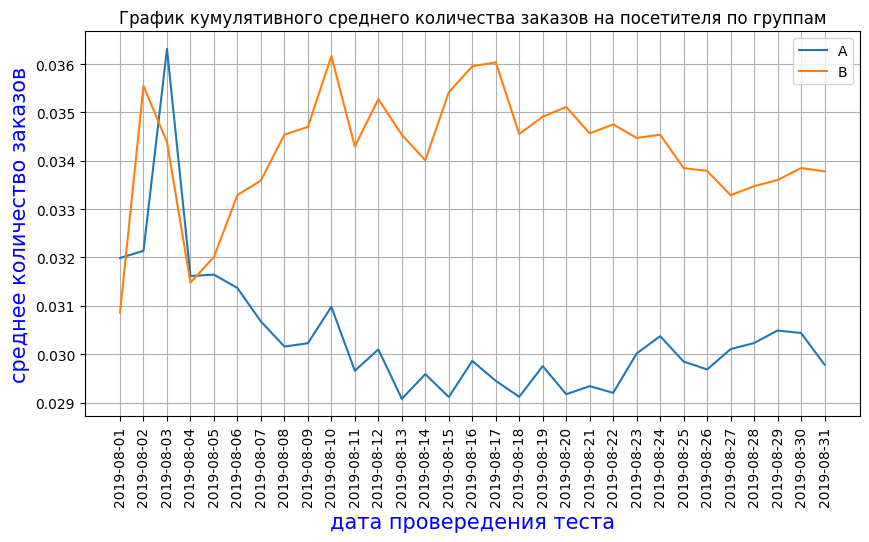
 
 
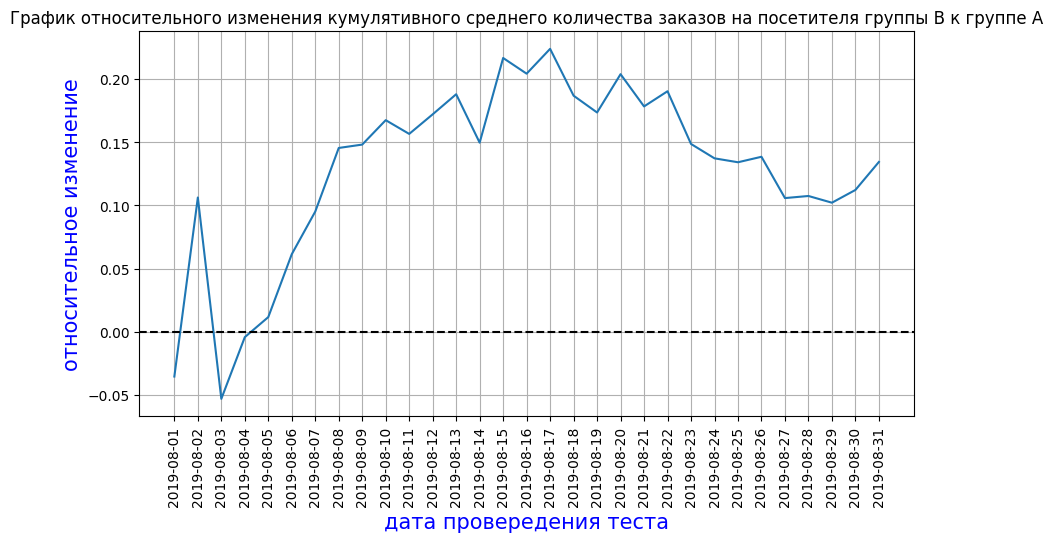
 
 
 - нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий
 - **p-value 0.646 по «сырым», 0.774 по «очищенным» данным - на общий вывод изменения не повлияли, только еще более убедили нас в том, что какого-либо различия в среднем чеке не наблюдается**
 - **относительная сила группы `B` 0.176 по «сырым», 0.005 по «очищенным» данным, тут очищенный датасет показал, что в группах присутствовали достаточно мощные выбросы, после удаления которых, данных пришли в норму, и мы более не наблюдаем какого-либо значимого относительного различия между группами**
 - **исходя из обнаруженных фактов, тест следует остановить и признать его успешным** 
 - обнаружено статистически значимое различие в среднем количестве заказов между группами
 - **группа B показывает себя лучше группы A по количеству заказов на 14.5%**
 - статистически значимого различия в среднем чеке не обнаружено
 - продолжать смысла нет, так как наблюдаем фиксацию результатов, тенденций к изменению полученных результатов не обнаруживаем
---

## Общий вывод

# Исследование для  отдела маркетинга интернет-магазина

**Описание проекта**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Нам неободимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.  
**В наличии есть следующие данные:**
- в файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
- в файлах `/datasets/orders.csv` и `/datasets/visitors.csv` описанные результаты проведенного A/B-теста.

**Цель исследования**

Часть 1. Приоритизация гипотез.
- приоритизировать гипотезы с помощью фреймворков ICE и RICE

Часть 2. Анализ A/B-теста
- проанализировать A/B-тест
- построить график: 
 - кумулятивной выручки
 - среднего чека 
 - относительного изменения кумулятивного среднего чека 
 - кумулятивного среднего количества заказов на посетителя
 - относительного изменения кумулятивного среднего количества заказов на посетителя
 - точечный график количества заказов по пользователям
 - точечный график стоимостей заказов
- выбрать границу для определения аномальных пользователей и аномальных заказов
- посчитать статистическую значимость различий в среднем количестве заказов и среднем чеке заказа по сырым и очищенным данным
- cделать выводы и предположения
- принять решение по результатам теста и объяснить его

**Ход исследования**
1. Загрузить файлы с данными и выполнить обзор данных
2. Предобработка данных
3. Приоритизация гипотез
4. Анализ A/B-теста
5. Общий вывод
---

### Файлы с данными и общая информация

**Отобразили начальные строки таблиц и общую информацию**  

**Описание данных**  
В нашем распоряжении три датасета. Файл `hypothesis.csv` хранит информацию о гипотезах, `orders.csv` — информацию о заказах, а `visitors.csv` — информацию о визитах пользователей.

Структура `hypothesis.csv`:  
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
- **Таблица с 5 столбцами(4 числовых и 1 строковый) и 9 строками**

Структура `orders.csv`:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.
- **Таблица с 5 столбцами(3 числовых и 2 строковых) и 1197 строками**

Структура `visitors.csv`:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста
- **Таблица с 3 столбцами(1 числовой и 2 строковых) и 62 строками**
---

### Предобработка данных

**заменили названия столбцов**
- привели к нижнему регистру

**преобразовали данные в нужные типы**
- в столбцах `visits['date']` и `orders['date']` перевели значения в специальный формат для работы с датами

**обработали пропуски**
- пропусков не обнаружено

**обработали дубликаты**
- явные дубликаты отсутствуют
- проверили неявные дубликаты
 - выяснили, есть ли в таблице `orders` пользователи, оказавшиеся одновременно в двух группах. При А/В тестировании могут быть ошибки при логировании и распределении пользователей по группам
 - нашли ID пользователей, оказавшихся одновременно в двух группах
 - определили для них правильную группу - это та группа, в которую они залогинились в первый раз
 - присвоили правильное значение группы для пользователей

**обработали редкие и выбивающиеся значения**
- на данном этапе исследования не будем выявлять и удалять эти значения, они необходимы для проведения A/B теста на 'сырых данных'
---

### Приоритизация гипотез

**Применили фреймворк ICE для приоритизации гипотез. Отсортировали их по убыванию приоритета**
- на первом месте оказалась гипотеза 8, далее гипотезы 0 и 7

**Применили фреймворк RICE для приоритизации гипотез. Отсортировали их по убыванию приоритета**
- первое место за гипотезой 7, далее гипотезы 2 и 0

**Наблюдаем изменение приоритизации гипотез при применении RICE вместо ICE. Это не удивительно, так как гипотеза ICE не учитывает такого важного параметра как `Reach — скольких пользователей затронет изменение, которое вы хотите внести`**  
**Считаем приоритизацию через фреймворк `RICE` более подходящей для нашего исследования, так как в нем учитываются больше параметров для оценки**


- Для дальнейшей работы возьмем гипотезу `7`,- **'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'**
---

### Анализ A/B-теста

**Проанализировали A/B-тест**
- подготовили данные, получили агрегированные кумулятивные по дням данные о заказах и визитах пользователей


- построили график кумулятивной выручки по группам
 - **выручка почти равномерно увеличивается в течение всего теста. Хороший знак**
 - **однако график выручки группы `B` между 18 и 19 августа резко вырос. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализировали позже**


- построили график кумулятивного среднего чека по группам
 - **cредний чек становится равномерным с середины теста**
 - **возможно, в группу `B` в середине теста попали крупные заказы (резкий всплеск на графике)**


- построили график относительного изменения кумулятивного среднего чека группы B к группе A
 - **в нескольких точках график различия между сегментами резко «скачет»**
 - **все указывает на наличие выбросов в данных**
 
 
- построили график кумулятивного среднего количества заказов на посетителя по группам
 - **группы сильно колебались в начале теста, но затем стабилизировались**
 - **среднее количества заказов на посетителя группы `B` вырвалось вперед и зафиксировалось, а группы `A` просела и также зафиксировалась**
 
 
- построили график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
 - **в начале теста группа B проигрывала группе A, затем после 5 августа вырвалась вперед и далее находится выше группы A**
 - **с 10 августа отношение стабилизировалось**
 
 
- построим точечный график количества заказов по пользователям
 - **есть пользователи, которые совершали 5, 8, 9 и 11 заказов**
 - **большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна**
 - **их точная доля не ясна — непонятно, считать их аномалиями или нет**
 
 
- посчитали 95-й и 99-й перцентили количества заказов на пользователя. Выбрали границу для определения аномальных пользователей
 - не более **5%** пользователей оформляли больше чем **2 заказа**
 - не более **1%** пользователей заказывали более **4 раз**
 - разумно выбрать **3 заказа** на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней
 
 
- построили точечный график стоимостей заказов
 - **в данных явно есть аномально дорогие заказы**
 - однако большинство всё-таки имеет меньшую выручку
 - **по графику сложно выбрать границу аномальных заказов**


- посчитали 95-й и 99-й перцентили стоимости заказов. Выбрали границу для определения аномальных заказов
 - не более **5%** заказов дороже **28 000 рублей**
 - не более **1%** дороже **58 233 рублей**
 - примем за аномальных пользователей тех, кто совершил покупку **дороже 28 000 рублей**. Так мы уберём **5%** пользователей с наиболее дорогими заказами
 
 
- **посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**
 - сформулировали гипотезы: **Нулевая** - различий в среднем количестве заказов на посетителя между группами нет и **Альтернативная** - различия в среднем между группами есть
 - объявили переменные, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни
 - применили критерий Манна-Уитни и вывели относительный прирост среднего числа заказов группы B над группой А
 - критический уровень статистической значимости мы приняли **5%** - это является общепринятым пороговым значением
 - значение p-value показывает: вероятность случайно получить такое или большее различие **1,7%**. Это достаточная вероятность, чтобы делать вывод о значимом различии
 - полученные данные противоречат нулевой гипотезе о том, что различий в среднем количестве заказов на посетителя между группами нет, поэтому у нас есть основания отбросить нулевую гипотезу и принять гипотезу о том, что **различия есть**
 - p-значение **0.017 < 0.05** (критический уровень статистической значимости)
 - **отвергаем нулевую гипотезу: разница статистически значима**
 - **по «сырым» данным можем предположить что различия в среднем количестве заказов на посетителя между группами есть**
 - относительный выигрыш группы B равен **13.4%**


- **посчитали статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным**
 - сформулировали гипотезы: **Нулевая** - различий в среднем чеке заказа между группами нет и **Альтернативная** - различия в среднем чеке заказа между группами есть
 - критический уровень статистической значимости мы приняли **5%** - это является общепринятым пороговым значением
 - значение p-value показывает: вероятность случайно получить такое или большее различие **64,6%**. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками покупателей
 - полученные данные не противоречат нулевой гипотезе о том, что **различий в среднем чеке заказа между группами нет**
 - p-значение **0.646 > 0.05** (критический уровень статистической значимости)
 - **не можем отвергнуть нулевую гипотезу: разница не является статистически значимой**
 - **по «сырым» данным можем предположить что различия в среднем количестве заказов на посетителя между группами нет**
 - относительный выигрыш группы B равен **17.6%**


- **посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**
 - приняли за аномальных пользователей тех, кто совершил **более 3 заказов** или совершил заказ **дороже 28 000 рублей**
 - получили **67 аномальных пользователя**
 - применили статистический критерий Манна-Уитни к полученным выборкам без аномальных пользователей
 - критический уровень статистической значимости мы приняли **5%** - это является общепринятым пороговым значением
 - значение p-value показывает: вероятность случайно получить такое или большее различие **1,7%**. Это достаточная вероятность, чтобы делать вывод о значимом различии
 - полученные данные противоречат нулевой гипотезе о том, что различий в среднем количестве заказов на посетителя между группами нет, поэтому у нас есть основания отбросить нулевую гипотезу и принять гипотезу о том, что различия есть
 - p-значение **0.017 < 0.05** (критический уровень статистической значимости)
 - **отвергаем нулевую гипотезу: разница статистически значима**
 - **по «очищенным» данным можем предположить что различия в среднем количестве заказов на посетителя между группами есть**
 - относительный выигрыш группы B равен **14.5%**
 - **результаты по среднему количеству заказов по «сырым» и «очищенным» данным не изменились**
 - **p-value 0.017 по «сырым», 0.017 по «очищенным» данным**
 - **относительная сила группы `B` 0.134 по «сырым», 0.145 по «очищенным» данным**
 

- **посчитали статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**
 - критический уровень статистической значимости мы приняли **5%** - это является общепринятым пороговым значением
 - значение p-value показывает: вероятность случайно получить такое или большее различие **77,4%**. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками покупателей
 - полученные данные не противоречат нулевой гипотезе о том, что различий в среднем чеке заказа между группами нет
 - p-значение **0.774 > 0.05** (критический уровень статистической значимости)
 - **не можем отвергнуть нулевую гипотезу: разница не является статистически значимой**
 - **по «очищеным» данным можем предположить что различия в среднем количестве заказов на посетителя между группами нет**
 - относительный выигрыш группы B равен **0.5%**
 - **результаты по среднему чеку по «сырым» и «очищенным» данным претерпели определнные изменения**
 - **p-value 0.646 по «сырым», 0.774 по «очищенным» данным - на общий вывод изменения не повлияли, только еще более убедили нас в том, что какого-либо различия в среднем чеке не наблюдается**
 - **относительная сила группы `B` 0.176 по «сырым», 0.005 по «очищенным» данным, тут очищенный датасет показал, что в группах присутствовали достаточно мощные выбросы, после удаления которых, данных пришли в норму, и мы более не наблюдаем какого-либо значимого относительного различия между группами**
 
 
- **приняли решение по результатам A/B теста**
 - есть статистически значимое различия по среднему количеству заказов между группами и по «сырым» и по данным после фильтрации аномалий
 - **p-value 0.017 по «сырым», 0.017 по «очищенным» данным**
 - **относительная сила группы `B` 0.134 по «сырым», 0.145 по «очищенным» данным**
 - график различия среднего количества заказов между группами сообщает, что **результаты группы B лучше группы A**
 
 
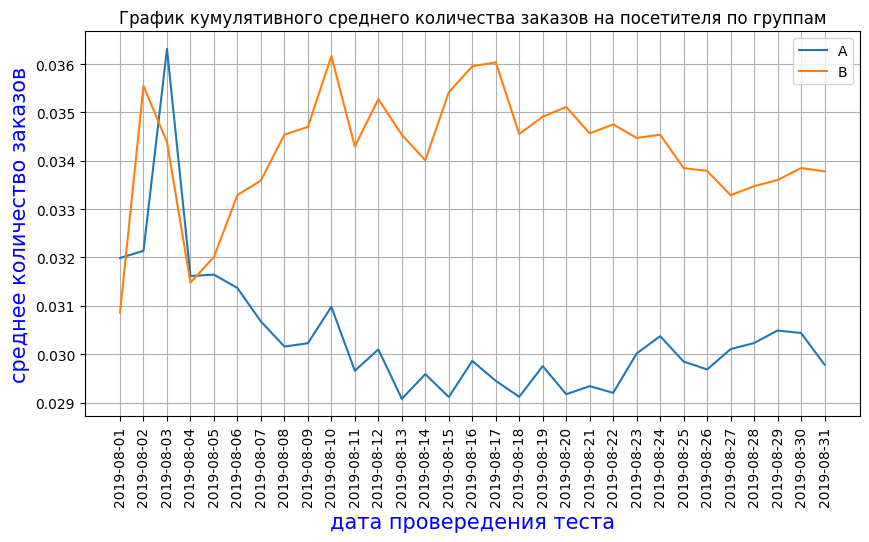
 
 
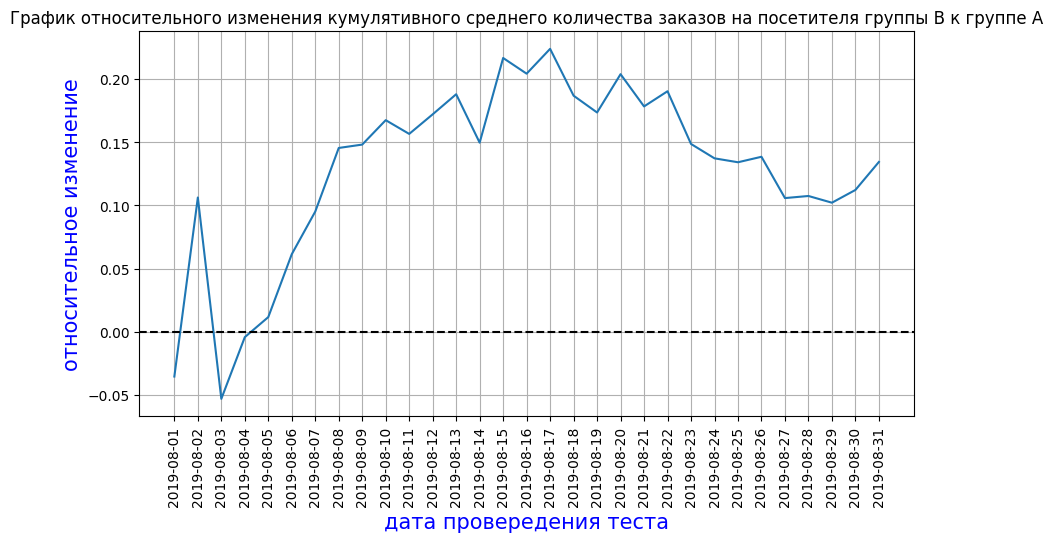
 
 
 - нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий
 - **p-value 0.646 по «сырым», 0.774 по «очищенным» данным - на общий вывод изменения не повлияли, только еще более убедили нас в том, что какого-либо различия в среднем чеке не наблюдается**
 - **относительная сила группы `B` 0.176 по «сырым», 0.005 по «очищенным» данным, тут очищенный датасет показал, что в группах присутствовали достаточно мощные выбросы, после удаления которых, данных пришли в норму, и мы более не наблюдаем какого-либо значимого относительного различия между группами**
 - **исходя из обнаруженных фактов, тест следует остановить и признать его успешным** 
 - обнаружено статистически значимое различие в среднем количестве заказов между группами
 - **группа B показывает себя лучше группы A по количеству заказов на 14.5%**
 - статистически значимого различия в среднем чеке не обнаружено
 - продолжать смысла нет, так как наблюдаем фиксацию результатов, тенденций к изменению полученных результатов не обнаруживаем
---